<a href="https://colab.research.google.com/github/SSDivyaRavali/EDA_PRACTICE/blob/main/loan_risk_analy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessacary packages into python


In [ ]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings


warnings.filterwarnings('ignore') #To ignore the warnings

**1) Reading  the Data and finding information about the data**

In [ ]:
app_data=pd.read_csv("/content/application_data.csv",delimiter=',',skip_blank_lines=True, keep_default_na=False, na_values=["","XNA"])
prev_data=pd.read_csv("/content/previous_application.csv",delimiter=',',skip_blank_lines=True, keep_default_na=False, na_values=["","XNA"])


In [ ]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15.0,Y,1.0,0.0,0.182832,0.867336,XAP,Approved,-73.0,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,NaN,Country-wide,35.0,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,-164.0,NaN,XAP,Unaccompanied,Repeater,NaN,Cash,x-sell,Contact center,-1.0,NaN,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,-301.0,Cash through the bank,XAP,"Spouse, partner",Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,-512.0,Cash through the bank,XAP,NaN,Repeater,NaN,Cash,x-sell,Credit and cash offices,-1.0,NaN,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9.0,Y,1.0,NaN,NaN,NaN,Repairs,Refused,-781.0,Cash through the bank,HC,NaN,Repeater,NaN,Cash,walk-in,Credit and cash offices,-1.0,NaN,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
app_data.shape

(104757, 122)

**2) INSPECTION OF DATA FOR DATA CLEANING**

Get a concise summary of a DataFrame using info method.information about a DataFrame including the index dtype and columns, non-null values and memory usage. info arguments specify :

**verbose**:  bool, optional.
 

*   Whether to print the full summary. By default, the setting in pandas.options.display.max_info_columns is followed.
*   verbose false, Prints a summary of columns count and its dtypes but not per column information
*   List item



**show_counts:** bool, optional

*  Whether to show the non-null counts. By default, this is shown only if the DataFrame is smaller than pandas.options.display.max_info_rows and pandas.options.display.max_info_columns. A value of True always shows the counts, and False never shows the counts.


 





In [ ]:
app_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104757 entries, 0 to 104756
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    104757 non-null  int64  
 1   TARGET                        104757 non-null  int64  
 2   NAME_CONTRACT_TYPE            104757 non-null  object 
 3   CODE_GENDER                   104754 non-null  object 
 4   FLAG_OWN_CAR                  104757 non-null  object 
 5   FLAG_OWN_REALTY               104757 non-null  object 
 6   CNT_CHILDREN                  104757 non-null  int64  
 7   AMT_INCOME_TOTAL              104757 non-null  float64
 8   AMT_CREDIT                    104757 non-null  float64
 9   AMT_ANNUITY                   104750 non-null  float64
 10  AMT_GOODS_PRICE               104674 non-null  float64
 11  NAME_TYPE_SUITE               104330 non-null  object 
 12  NAME_INCOME_TYPE              104757 non-nu

In [ ]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,104757.000000,104757.000000,104757.000000,1.047570e+05,1.047570e+05,104750.000000,1.046740e+05,104757.000000,104757.000000,104757.000000,104757.000000,104757.000000,35557.000000,104757.00000,104757.000000,104757.000000,104756.000000,104756.000000,104756.000000,104755.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,45776.000000,1.045310e+05,83966.000000,51646.000000,43592.000000,53723.000000,35252.000000,31677.000000,48930.000000,52063.000000,52679.000000,...,52063.000000,52679.000000,33829.000000,42669.000000,33232.000000,52208.000000,32158.000000,47037.000000,54222.000000,104408.000000,104408.000000,104408.000000,104408.000000,104755.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.00000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,104756.000000,90655.000000,90655.000000,90655.000000,90655.000000,90655.000000,90655.000000
mean,160768.708077,0.081331,0.418101,1.694783e+05,5.989248e+05,27096.485327,5.383124e+05,0.020856,-16025.002721,63313.971190,-4985.040360,-2993.840459,12.015552,0.99999,0.821224,0.199681,0.997976,0.278724,0.056388,2.156174,2.053257,2.032332,12.057791,0.015092,0.050365,0.039950,0.079012,0.231166,0.179092,0.502570,5.142319e-01,0.510417,0.117299,0.088733,0.977708,0.751741,0.044900,0.078504,0.149992,0.225891,...,0.149444,0.225548,0.231452,0.066935,0.101647,0.108568,0.008800,0.027950,0.102478,1.422516,0.142278,1.405592,0.098556,-962.290554,0.000048,0.712026,0.000134,0.015207,0.087098,0.000200,0.080912,0.003627,0.000019,0.004124,0.00001,0.003494,0.003036,0.001117,0.010109,0.000239,0.008229,0.000659,0.000496,0.000325,0.006618,0.007291,0.033534,0.268270,0.266450,1.893255
std,35080.352790,0.273344,0.721583,3.756602e+05,4.023394e+05,14508.135747,3.697088e+05,0.013821,4369.083655,140857.745804,3523.522224,1510.672805,11.854445,0.00309,0.383166,0.399763,0.044941,0.448374,0.230671,0.909613,0.509879,0.503432,3.262309,0.121920,0.218697,0.195843,0.269759,0.421580,0.383431,0.211404,1.914994e-01,0.195146,0.108147,0.082907,0.058958,0.113722,0.077931,0.133931,0.100262,0.144907,...,0.100586,0.145400,0.162083,0.080974,0.093754,0.112458,0.047911,0.068909,0.107854,2.314252,0.439720,2.294443,0.355539,827.563256,0.006909,0.452821,0.011560,0.122375,0.281979,0.014157,0.272701,0.060119,0.004369,0.064085,0.00309,0.059006,0.055013,0.033401,0.100036,0.0154

1.DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH columns(attributes) are with negative sign.

2.Maximum value for DAYS_EMPLOYED is 365243 which when converted to years gives 
1000.MAx value for Days_Birth is negative which doesn't make sense.It is an outlier as no person would serve so long.



In [ ]:
#convert negative to absolute values
date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in date_col:
    app_data[col] = abs(app_data[col])

In [ ]:
prev_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231759 entries, 0 to 231758
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_PREV                   231759 non-null  int64  
 1   SK_ID_CURR                   231759 non-null  int64  
 2   NAME_CONTRACT_TYPE           231714 non-null  object 
 3   AMT_ANNUITY                  181761 non-null  float64
 4   AMT_APPLICATION              231759 non-null  float64
 5   AMT_CREDIT                   231759 non-null  float64
 6   AMT_DOWN_PAYMENT             111889 non-null  float64
 7   AMT_GOODS_PRICE              180228 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   231758 non-null  object 
 9   HOUR_APPR_PROCESS_START      231758 non-null  float64
 10  FLAG_LAST_APPL_PER_CONTRACT  231758 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       231758 non-null  float64
 12  RATE_DOWN_PAYMENT            111888 non-null  float64
 13 

In [ ]:
pd.isnull(prev_data).sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                 45
AMT_ANNUITY                     49998
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               119870
AMT_GOODS_PRICE                 51531
WEEKDAY_APPR_PROCESS_START          1
HOUR_APPR_PROCESS_START             1
FLAG_LAST_APPL_PER_CONTRACT         1
NFLAG_LAST_APPL_IN_DAY              1
RATE_DOWN_PAYMENT              119871
RATE_INTEREST_PRIMARY          230930
RATE_INTEREST_PRIVILEGED       230930
NAME_CASH_LOAN_PURPOSE          90061
NAME_CONTRACT_STATUS                1
DAYS_DECISION                       1
NAME_PAYMENT_TYPE               84325
CODE_REJECT_REASON                749
NAME_TYPE_SUITE                113016
NAME_CLIENT_TYPE                  255
NAME_GOODS_CATEGORY            127330
NAME_PORTFOLIO                  49998
NAME_PRODUCT_TYPE              150477
CHANNEL_TYPE                        1
SELLERPLACE_

In [ ]:
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.317590e+05,231759.000000,181761.000000,2.317590e+05,2.317590e+05,1.118890e+05,1.802280e+05,231758.000000,231758.000000,111888.000000,829.000000,829.000000,231758.000000,2.317580e+05,181761.000000,141302.000000,141302.000000,141302.000000,141302.000000,141302.000000,141302.000000
mean,1.920515e+06,278618.616265,15611.194728,1.709133e+05,1.908972e+05,6.624036e+03,2.198170e+05,12.485235,0.996406,0.079521,0.191826,0.779263,-895.436386,3.405851e+02,15.715225,343073.145412,13873.932159,32744.602433,76188.764667,81334.212800,0.325827
std,5.337304e+05,102799.998841,14617.241778,2.863248e+05,3.123444e+05,1.830046e+04,3.077325e+05,3.325816,0.059844,0.107236,0.093440,0.099995,786.335939,1.185303e+04,14.235521,87341.818409,72568.662915,105438.796373,149377.722465,152880.474342,0.468685
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.059121,0.373150,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2892.000000,-2800.000000,-2888.000000,-2847.000000,0.000000
25%,1.458053e+06,189654.000000,6190.335000,2.047500e+04,2.509875e+04,0.000000e+00,4.945500e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1337.000000,-1.000000e+00,6.000000,365243.000000,-1648.000000,-1268.000000,-1338.000000,-1296.000000,0.000000
50%,1.920228e+06,278907.000000,11012.400000,7.069500e+04,7.905600e+04,1.701000e+03,1.074060e+05,12.000000,1.000000,0.052995,0.189136,0.835095,-594.000000,6.000000e+00,12.000000,365243.000000,-831.000000,-370.000000,-542.000000,-503.000000,0.000000
75%,2.382790e+06,367952.000000,20052.675000,1.800000e+05,2.025000e+05,7.726500e+03,2.250000e+05,15.000000,1.000000,0.108909,0.193330,0.852537,-286.000000,1.000000e+02,24.000000,365243.000000,-409.000000,118.000000,-75.000000,-47.000000,1.000000
max,2.845382e+06,456255.000000,417927.645000,3.826372e+06,4.104351e+06,1.201500e+06,3.826372e+06,23.000000,1.000000,0.989740,1.000000,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


Few Columns like Days_DEcision, Sellerplace_area min values are negative 

CNT_PAYMENT describes the term of payment in months. Hence, should be in integer datatype

In [ ]:
#Converting negative  to positive 
prev_data['DAYS_DECISION'] = abs(prev_data['DAYS_DECISION'])
prev_data['SELLERPLACE_AREA'] = abs(prev_data['SELLERPLACE_AREA'])

In [ ]:
#checking for duplicate rows using SK_ID_CURR which is the unique key in application data
app_data.SK_ID_CURR.duplicated().sum()

0

In [ ]:
#checking for duplicate rows using SK_ID_PREV which is the unique key in previous data
prev_data.SK_ID_PREV.duplicated().sum()

0

There are no duplicate records in application_data
For each loan application new ID is generated

There are no duplicate records in application and previous data.


**3) DEALING WITH MISSING VALUES**

df.isnull() method: Detect missing values.Return a boolean same-sized object indicating if the values are NA. 
> Drop the columns where missing values greater than 50%(.If the information contained in the variable is not that high, you can drop the variable if it has more than 50% missing values)





In [ ]:
# Finding the percentage of missing values in all columns
round(app_data.isnull().mean()*100,2).sort_values(ascending = False)

COMMONAREA_AVG                 69.76
COMMONAREA_MODE                69.76
COMMONAREA_MEDI                69.76
NONLIVINGAPARTMENTS_AVG        69.30
NONLIVINGAPARTMENTS_MEDI       69.30
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
REG_REGION_NOT_LIVE_REGION      0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

In [ ]:
#Removing all the columns with more than 40% nulls values
#app_data=app_data.loc[:,app_data.isnull().mean()<=0.4]
app_data.shape

(104757, 122)

Handling with 30% missing values in columns to replace with appropriate value`

In [ ]:
#Selecting columns with less or equal to than 30% null vallues
aml=list(app_data.columns[(app_data.isnull().mean()<=0.30) & (app_data.isnull().mean()>0.00)])
len(aml)

52

In [ ]:
round(prev_data.isnull().mean()*100,2).sort_values(ascending = False)


RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_PRODUCT_TYPE              64.93
NAME_GOODS_CATEGORY            54.94
AMT_DOWN_PAYMENT               51.72
RATE_DOWN_PAYMENT              51.72
NAME_SELLER_INDUSTRY           48.96
NAME_TYPE_SUITE                48.76
NFLAG_INSURED_ON_APPROVAL      39.03
DAYS_LAST_DUE                  39.03
DAYS_LAST_DUE_1ST_VERSION      39.03
DAYS_FIRST_DUE                 39.03
DAYS_FIRST_DRAWING             39.03
DAYS_TERMINATION               39.03
NAME_CASH_LOAN_PURPOSE         38.86
NAME_PAYMENT_TYPE              36.38
NAME_YIELD_GROUP               30.17
AMT_GOODS_PRICE                22.23
NAME_PORTFOLIO                 21.57
AMT_ANNUITY                    21.57
CNT_PAYMENT                    21.57
CODE_REJECT_REASON              0.32
NAME_CLIENT_TYPE                0.11
NAME_CONTRACT_TYPE              0.02
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
AMT_APPLICATION                 0.00
A

In [ ]:
#Removing all the columns with more than 40% nulls values i.e only 4 columns for this dataset 
#prev_data=prev_data.loc[:,prev_data.isnull().mean()<=0.4]
#prev_data.columns

In [ ]:
#Selecting columns with less or equal to than 20% null vallues
pml=list(prev_data.columns[(prev_data.isnull().mean()<=0.30) & (prev_data.isnull().mean()>0.00)])
len(pml),pml

(16,
 ['NAME_CONTRACT_TYPE',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'FLAG_LAST_APPL_PER_CONTRACT',
  'NFLAG_LAST_APPL_IN_DAY',
  'NAME_CONTRACT_STATUS',
  'DAYS_DECISION',
  'CODE_REJECT_REASON',
  'NAME_CLIENT_TYPE',
  'NAME_PORTFOLIO',
  'CHANNEL_TYPE',
  'SELLERPLACE_AREA',
  'CNT_PAYMENT',
  'PRODUCT_COMBINATION'])

AMT_CREDIT:- Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT

PRODUCT_COMBINATION:- Detailed product combination of the previous application

In [ ]:
prev_data[pml].isnull().sum()

NAME_CONTRACT_TYPE                45
AMT_ANNUITY                    49998
AMT_GOODS_PRICE                51531
WEEKDAY_APPR_PROCESS_START         1
HOUR_APPR_PROCESS_START            1
FLAG_LAST_APPL_PER_CONTRACT        1
NFLAG_LAST_APPL_IN_DAY             1
NAME_CONTRACT_STATUS               1
DAYS_DECISION                      1
CODE_REJECT_REASON               749
NAME_CLIENT_TYPE                 255
NAME_PORTFOLIO                 49998
CHANNEL_TYPE                       1
SELLERPLACE_AREA                   1
CNT_PAYMENT                    49998
PRODUCT_COMBINATION               46
dtype: int64

In [ ]:
prev_data[prev_data['PRODUCT_COMBINATION'].isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
6664,2515161,222844,NaN,NaN,0.0,0.0,NaN,NaN,SATURDAY,8.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,351.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,10.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9029,1851920,417884,NaN,NaN,0.0,0.0,NaN,NaN,MONDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,291.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,30.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17038,2389511,148922,NaN,NaN,0.0,0.0,NaN,NaN,TUESDAY,6.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,395.0,NaN,XAP,NaN,New,NaN,NaN,NaN,Country-wide,20.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24543,2494449,366626,NaN,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,418.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,41.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24574,2781877,394843,NaN,NaN,0.0,0.0,NaN,NaN,SATURDAY,6.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,601.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,42.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25030,2785890,154490,NaN,NaN,0.0,0.0,NaN,NaN,TUESDAY,21.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,516.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,35.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39305,2457349,307803,NaN,NaN,0.0,0.0,NaN,NaN,WEDNESDAY,15.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,307.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,50.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39461,2456391,164367,NaN,NaN,0.0,0.0,NaN,NaN,SUNDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,338.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,55.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52461,2447432,426909,NaN,NaN,0.0,0.0,NaN,NaN,THURSDAY,16.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,344.0,NaN,XAP,NaN,New,NaN,NaN,NaN,Country-wide,30.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61664,2022193,378447,NaN,NaN,0.0,0.0,NaN,NaN,THURSDAY,13.0,Y,1.0,NaN,NaN,NaN,XAP,Canceled,476.0,NaN,XAP,NaN,Repeater,NaN,NaN,NaN,Country-wide,50.0,Connectivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
(prev_data['PRODUCT_COMBINATION'].isna()==prev_data['NAME_CONTRACT_TYPE'].isna()).unique()

array([ True, False])

In [ ]:
prev_data['NAME_PORTFOLIO'].value_counts(sort=True)

POS      100418
Cash      61361
Cards     19921
Cars         61
Name: NAME_PORTFOLIO, dtype: int64

In [ ]:
(prev_data[prev_data['NAME_PORTFOLIO'].isna()]['SK_ID_PREV']==prev_data[prev_data['CNT_PAYMENT'].isna()]['SK_ID_PREV']).unique()

array([ True])

In [ ]:
prev_data.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE','CODE_REJECT_REASON'])['NAME_PORTFOLIO'].value_counts()

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE  CODE_REJECT_REASON  NAME_PORTFOLIO
Approved              Cash loans          XAP                 Cash              42017
                      Consumer loans      XAP                 POS               90957
                                                              Cars                 45
                      Revolving loans     XAP                 Cards             13460
Canceled              Cash loans          XAP                 Cash                878
                      Consumer loans      XAP                 POS                  31
                                                              Cars                  4
                      Revolving loans     XAP                 Cards                61
Refused               Cash loans          HC                  Cash              13044
                                          LIMIT               Cash               2789
                                          SCO                 C

Note that 

'PRODUCT_COMBINATION' missing values rows also have NAME_CONTRACT_TYPE missing

CNT_PAYMENT and NAME_PORTFOLIO' have same records missing

In [ ]:
prev_data['CODE_REJECT_REASON'].value_counts()

XAP       188211
HC         23596
LIMIT       7892
SCO         5225
CLIENT      3776
SCOFR       1742
VERIF        456
SYSTEM       112
Name: CODE_REJECT_REASON, dtype: int64

In [ ]:
prev_data['CODE_REJECT_REASON'].fillna('XAP',inplace=True)


In [ ]:
prev_data['CODE_REJECT_REASON'].isna().sum()

0

In [ ]:
prev_data[prev_data['CODE_REJECT_REASON']=='XAP'].groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE'])['NAME_CLIENT_TYPE'].value_counts(sort=True)

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE  NAME_CLIENT_TYPE
Approved              Cash loans          Repeater            35582
                                          Refreshed            4197
                                          New                  2221
                      Consumer loans      Repeater            45403
                                          New                 37225
                                          Refreshed            8326
                      Revolving loans     Repeater            11107
                                          Refreshed            1323
                                          New                  1027
Canceled              Cash loans          Repeater            32552
                                          Refreshed            2218
                                          New                   360
                      Consumer loans      Repeater              191
                                          Refreshed      

In [ ]:
prev_data['AMT_CREDIT'].isna().sum()

0

In [ ]:
prev_data[prev_data['AMT_CREDIT'].isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [ ]:
prev_data[(prev_data['SK_ID_CURR']==438387)& (prev_data['NAME_CONTRACT_TYPE']=='Revolving loans')]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
61881,2632871,438387,Revolving loans,11250.0,225000.0,225000.0,NaN,225000.0,FRIDAY,10.0,Y,1.0,NaN,NaN,NaN,XAP,Approved,608.0,NaN,XAP,NaN,Repeater,NaN,Cards,walk-in,AP+ (Cash loan),4.0,NaN,0.0,NaN,Card Street,-482.0,-436.0,365243.0,365243.0,365243.0,0.0


In [ ]:
prev_data.dropna(subset=['AMT_CREDIT'],inplace=True)

In [ ]:
prev_data[prev_data['AMT_CREDIT'].isna()]

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL


In [ ]:
prev_data['NAME_CONTRACT_TYPE'].isna().sum()

45

In [ ]:
prev_data.groupby(['NAME_CONTRACT_STATUS','NAME_CONTRACT_TYPE'])['PRODUCT_COMBINATION'].value_counts()

NAME_CONTRACT_STATUS  NAME_CONTRACT_TYPE  PRODUCT_COMBINATION           
Approved              Cash loans          Cash X-Sell: middle               15493
                                          Cash X-Sell: low                  11264
                                          Cash X-Sell: high                  6299
                                          Cash Street: high                  5296
                                          Cash Street: middle                2355
                                          Cash Street: low                   1310
                      Consumer loans      POS household with interest       33905
                                          POS mobile with interest          25281
                                          POS industry with interest        13083
                                          POS household without interest    10636
                                          POS mobile without interest        3093
                         

In [ ]:
prev_data[prev_data['PRODUCT_COMBINATION'].isna()].groupby('NAME_CONTRACT_STATUS')['NAME_CLIENT_TYPE'].value_counts()

NAME_CONTRACT_STATUS  NAME_CLIENT_TYPE
Canceled              Repeater            33
                      Refreshed            4
                      New                  3
Refused               Repeater             5
Name: NAME_CLIENT_TYPE, dtype: int64

**Outliers and data imbalance**  

In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104757 entries, 0 to 104756
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(97), int64(9), object(16)
memory usage: 97.5+ MB


Numerical columns and categorical columns seperation 

In [ ]:
#checking float type columns
app_data.select_dtypes(include='float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'EL

In [ ]:
#converting few counts to int like count columns and days 
ColumnToConvert = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
app_data.loc[:,ColumnToConvert]=app_data.loc[:,ColumnToConvert].apply(lambda col: col.astype('int',errors='ignore'))

In [ ]:
#Checking the object type columns
obj_col = list(app_data.select_dtypes(include='object').columns)
num_col = list(app_data.select_dtypes(exclude='object').columns)
len(num_col)

106

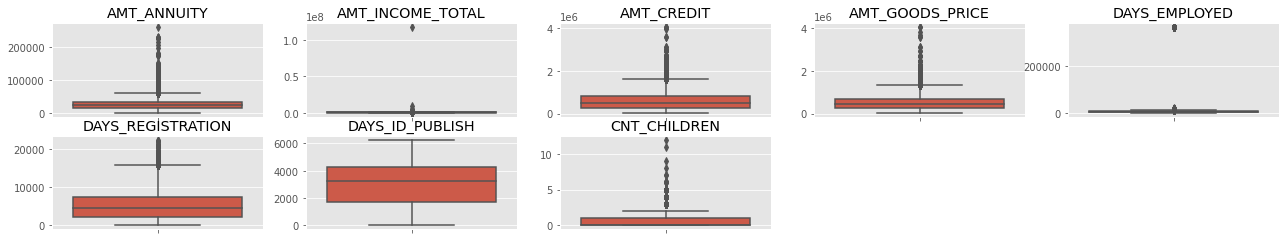

In [ ]:
out_col=['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_CHILDREN']
plt.figure(figsize=(22,10))
for i in enumerate(out_col):
    plt.subplot(5,5,i[0]+1)
    sns.boxplot(y=app_data[i[1]])
    plt.title(i[1])
    plt.ylabel("")

*  AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others 
* DAYS_ID_PUBLISH has no outliers



Binning days and possible numerical columns to category.
Data binning groups  numerical data into bins to understand trends and missing value replacement

The pandas documentation describes **qcut** as a “Quantile-based discretization function.” This basically means that qcut tries to divide up the underlying data into equal sized bins. The function defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.The simplest use of qcut is to define the number of quantiles and let pandas figure out how to divide up the data.precision to define how many decimal points to use for calculating the bin precision
If you want to define your own numeric bin ranges, then use **cut**

In [ ]:
app_data['AMT_INCOME_TOTAL'].describe()

count    1.047570e+05
mean     1.694783e+05
std      3.756602e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.440000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
app_data['AMT_INCOME_TOTAL'].quantile([0,0.2,0.3,0.7,0.92,1])

0.00        25650.0
0.20        99000.0
0.30       112500.0
0.70       180000.0
0.92       292500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K.Almost 20% has less than 100K

In [ ]:
pd.qcut(app_data['AMT_INCOME_TOTAL'],q=5,precision=0).value_counts(sort=True)


(99000.0, 135000.0]        29283
(162000.0, 225000.0]       25596
(25649.0, 99000.0]         21754
(225000.0, 117000000.0]    16089
(135000.0, 162000.0]       12035
Name: AMT_INCOME_TOTAL, dtype: int64

In [ ]:
bin_labels=['VeryLow','Low','Medium','High','VeryHigh']
app_data['INCOME_GROUP']=pd.qcut(app_data['AMT_INCOME_TOTAL'],
                                       q=[0,0.2,0.3,0.7,0.92,1],
                                       labels=['VeryLow','Low','Medium','High','VeryHigh'])

In [ ]:
app_data['INCOME_GROUP'].value_counts(normalize=True)*100

Medium      37.413252
High        22.352683
VeryLow     20.766154
Low         11.958151
VeryHigh     7.509761
Name: INCOME_GROUP, dtype: float64

In [ ]:
#new column to simplify the analysis with features that have correlation
app_data['CREDIT_INCOME_RATIO']=round((app_data['AMT_CREDIT']/app_data['AMT_INCOME_TOTAL']))
app_data['CREDIT_INCOME_RATIO'].describe()

count    104757.000000
mean          3.956872
std           2.704133
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          85.000000
Name: CREDIT_INCOME_RATIO, dtype: float64

8% of applicants have very high income range i.e above 300K 

In [ ]:
#Binning amout credit 
app_data['AMT_CREDIT']=app_data['AMT_CREDIT']/100000

b = [0,1,2,3,4,5,6,7,8,9,10,100]
bin_lab = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

app_data['AMT_CREDIT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=b,labels=bin_lab)

In [ ]:
#checking the binning of data and % of data in each category
app_data['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.813607
1M Above     16.278626
500k-600k    11.065609
400k-500k    10.405987
100K-200K     9.884781
300k-400k     8.527354
600k-700k     7.883960
800k-900k     7.062058
700k-800k     6.180971
900k-1M       2.938228
0-100K        1.958819
Name: AMT_CREDIT_RANGE, dtype: float64

In [ ]:
### Getting the percentage of social circle who defaulted
app_data['SOCIAL_CIRCLE_30_DAYS_DEF_PERC']=app_data['DEF_30_CNT_SOCIAL_CIRCLE']/app_data['OBS_30_CNT_SOCIAL_CIRCLE']
app_data['SOCIAL_CIRCLE_60_DAYS_DEF_PERC']=app_data['DEF_60_CNT_SOCIAL_CIRCLE']/app_data['OBS_60_CNT_SOCIAL_CIRCLE']

Note:  More Than 16% loan applicants have taken loan which amounts to more than 1M. and most applications in range 200-300k

In [ ]:
app_data['AGE']=app_data['DAYS_BIRTH']//365.25
app_data['AGE'].describe()

count    104757.000000
mean         43.373216
std          11.959124
min          21.000000
25%          33.000000
50%          43.000000
75%          53.000000
max          68.000000
Name: AGE, dtype: float64

In [ ]:
#Binning DAYS_BIRTH
app_data['AGE'].quantile([0,0.17,0.25,0.43,0.68,1])

0.00    21.0
0.17    30.0
0.25    33.0
0.43    40.0
0.68    50.0
1.00    68.0
Name: AGE, dtype: float64

Note: 
Applicants age range(20-69)
32% loan applicants have age above 50 years. More than 57% of loan applicants have age over 40 years

In [ ]:
cut_labels_age = ['20-', '20+','25+', '30+','35+', '40+','45+','50+','55+']
app_data['AGE_GROUP']=pd.cut(app_data['AGE'],bins=[0,20,25,30,35,40,45,50,55,100],labels=cut_labels_age)

In [ ]:
#checking the binning of data and % of data in each category
app_data['AGE_GROUP'].value_counts(normalize=True)*100

55+    20.087440
35+    14.124116
40+    12.991972
30+    12.903195
25+    11.911376
50+    11.388260
45+    11.196388
20+     5.397253
20-     0.000000
Name: AGE_GROUP, dtype: float64

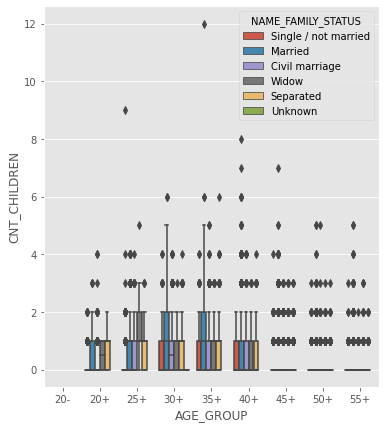

In [ ]:
plt.figure(figsize=(6,7))
sns.boxplot(y=app_data['CNT_CHILDREN'],hue=app_data['NAME_FAMILY_STATUS'],x=app_data['AGE_GROUP'])
plt.show()

In [ ]:
 app_data['DAYS_EMPLOYED'].describe()

count    104757.000000
mean      67230.320895
std      139031.084915
min           0.000000
25%         930.000000
50%        2205.000000
75%        5665.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [ ]:
# Creating bins for Employement Time
app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'] // 365.25
bins = [0,3,5,10,20,30,40,50,65,150]
slots = ['0-3','3-5','5-10','10-20','20-30','30-40','40-50','50-65','65 above']

app_data['EMPLOYMENT_YEAR']=pd.cut(app_data['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [ ]:
app_data['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-3         38.468181
5-10        25.026167
3-5         17.210069
10-20       14.334310
20-30        3.809923
30-40        1.085933
40-50        0.065418
65 above     0.000000
50-65        0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

Almost 40% applicants have experience within 0-3 and 90% of them have less than 10 years  

Analyze & delete Unnecessary Columns in application data 

In [ ]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'INCOME_GROUP', 'CREDIT_INCOME_RATIO',
       'AMT_CREDIT_RANGE', 'SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
       'SOCIAL_CIRCLE_60_DAYS_DEF_PERC', 'AGE', 'AGE_GROUP', 'YEARS_EMPLOYED',
       'EMPLOYMENT_YEAR'],
      dtype='object', length=131)

Contact Parameters

Note: 
'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE' 'FLAG_PHONE', 'FLAG_EMAIL' 
Provide only contact details
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY  Region ratings of client

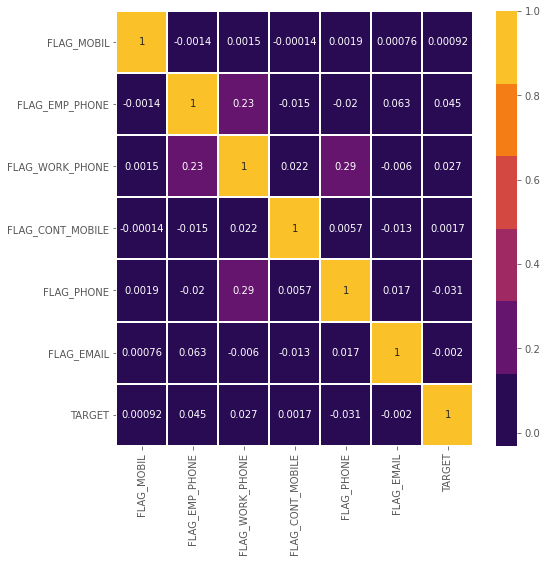

In [ ]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL','TARGET']
con_col=['CNT_FAM_MEMBERS','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
         'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
         'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','TARGET']
Contact_corr = app_data[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap =sns.color_palette("inferno"),
            linewidth=1)

There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [ ]:
app_data['AMT_GOODS_PRICE'].describe()

count    1.046740e+05
mean     5.383124e+05
std      3.697088e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Previous application data conversion 

In [ ]:
#Checking the number of unique values each column possess to identify categorical columns
prev_data.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL           2
NAME_PRODUCT_TYPE                   2
NFLAG_LAST_APPL_IN_DAY              2
FLAG_LAST_APPL_PER_CONTRACT         2
NAME_CLIENT_TYPE                    3
NAME_PAYMENT_TYPE                   3
NAME_CONTRACT_TYPE                  3
NAME_YIELD_GROUP                    4
NAME_PORTFOLIO                      4
NAME_CONTRACT_STATUS                4
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
CHANNEL_TYPE                        8
CODE_REJECT_REASON                  8
NAME_SELLER_INDUSTRY               10
RATE_INTEREST_PRIVILEGED           15
PRODUCT_COMBINATION                17
HOUR_APPR_PROCESS_START            24
NAME_CASH_LOAN_PURPOSE             24
NAME_GOODS_CATEGORY                26
CNT_PAYMENT                        38
RATE_INTEREST_PRIMARY              54
SELLERPLACE_AREA                 1709
DAYS_FIRST_DRAWING               2230
DAYS_TERMINATION                 2780
DAYS_LAST_DUE                    2830
DAYS_FIRST_D

Days_decision -Relative to current application when was the decision about previous application made

In [ ]:
#age group calculation e.g. 388 will be grouped as 300-400
prev_data['DAYS_DECISION_GROUP'] = (prev_data['DAYS_DECISION']-(prev_data['DAYS_DECISION'] % 400)).astype(str) \
       +'-'+ ((prev_data['DAYS_DECISION'] - (prev_data['DAYS_DECISION'] % 400)) + (prev_data['DAYS_DECISION'] % 400) \
       + (400 - (prev_data['DAYS_DECISION'] % 400))).astype(str)

In [ ]:
prev_data['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0.0-400.0        36.830069
400.0-800.0      22.973434
800.0-1200.0     12.373198
1200.0-1600.0     7.905626
2400.0-2800.0     6.635773
1600.0-2000.0     5.973447
2000.0-2400.0     5.844002
2800.0-3200.0     1.464021
nan-nan           0.000431
Name: DAYS_DECISION_GROUP, dtype: float64

Almost 37% loan applicatants have applied for a new loan within 0-400 days of previous loan decision

In [ ]:
prev_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL',
       'DAYS_DECISION_GROUP'],
      dtype='object')

In [ ]:
#Converting Categorical columns from Object to categorical
Cat_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','FLAG_LAST_APPL_PER_CONTRACT',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']
for col in Cat_col_p:
    prev_data[col] =pd.Categorical(prev_data[col])  

              

In [ ]:
obj=list(prev_data.select_dtypes(include='object').columns)
prev_data.drop(obj,axis=1,inplace=True)
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231759 entries, 0 to 231758
Data columns (total 36 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_PREV                   231759 non-null  int64   
 1   SK_ID_CURR                   231759 non-null  int64   
 2   NAME_CONTRACT_TYPE           231714 non-null  category
 3   AMT_ANNUITY                  181761 non-null  float64 
 4   AMT_APPLICATION              231759 non-null  float64 
 5   AMT_CREDIT                   231759 non-null  float64 
 6   AMT_DOWN_PAYMENT             111889 non-null  float64 
 7   AMT_GOODS_PRICE              180228 non-null  float64 
 8   HOUR_APPR_PROCESS_START      231758 non-null  float64 
 9   FLAG_LAST_APPL_PER_CONTRACT  231758 non-null  category
 10  NFLAG_LAST_APPL_IN_DAY       231758 non-null  float64 
 11  RATE_DOWN_PAYMENT            111888 non-null  float64 
 12  RATE_INTEREST_PRIMARY        829 non-null   

Data Analysis 

**Checking for imbalance in Target**

Imbalanced data typically refers to a classification problem where the number of observations per class is not equally distributed; often you'll have a large amount of data/observations for one class (referred to as the majority class), and much fewer observations for one or more other classes

In [ ]:
app_data['TARGET'].value_counts(normalize=True)*100

0    91.866892
1     8.133108
Name: TARGET, dtype: float64

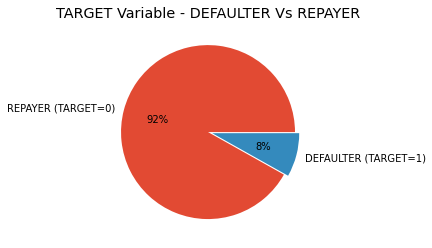

In [ ]:
plt.pie(app_data['TARGET'].value_counts(normalize=True)*100,labels=['REPAYER (TARGET=0)','DEFAULTER (TARGET=1)'],explode=(0,0.05),autopct='%1.f%%')
plt.title('TARGET Variable - DEFAULTER Vs REPAYER')
plt.show()

In [ ]:
Imbalance = app_data["TARGET"].value_counts().reset_index()
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.87 and 8.13
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.30 : 1 (approx)


**Univariate, Segmented univariate, Bivariate analysis**

In [ ]:
# From the remaining columns about 30 are selected based on their description and relevance with problem statement 
#for further analysis
FinalColumns = ['SK_ID_CURR','TARGET','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','INCOME_GROUP','AGE_GROUP','AMT_CREDIT','AMT_INCOME_TOTAL',
'CREDIT_INCOME_RATIO','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','DAYS_EMPLOYED',
'DAYS_REGISTRATION','FLAG_EMAIL','OCCUPATION_TYPE','EMPLOYMENT_YEAR',
'CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','ORGANIZATION_TYPE','SOCIAL_CIRCLE_30_DAYS_DEF_PERC',
'SOCIAL_CIRCLE_60_DAYS_DEF_PERC','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','NAME_CONTRACT_TYPE','AMT_ANNUITY','REGION_RATING_CLIENT','AMT_GOODS_PRICE']

In [ ]:
app_data_final=app_data[FinalColumns]

Splitting the dataframe into two separate dataframes with all the data related to defaulters and repayers respectively

Univariate Analysis

Function to plot the univariate categorical variables are common functions customized to perform uniform anaysis 

In [ ]:
# function to count plot for categorical variables
def plot_uni_cat(feature,ylog=False,label_rotation=False,horizontal_layout=True,annotations=True):

    temp = app_data_final[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_data_final[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    plt.style.use('ggplot')
    sns.despine #removes spines

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(5,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,12))

# 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=app_data_final,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette='Set2')
    
    ax1.set_title(f'Distribution of {feature} for Defaulters and Non-Defaulters',fontsize=10)
    ax1.legend(['Repayer','Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Total Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    
    if label_rotation:
      ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")

    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    if ylog:
      for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(app_data_final))*100), (p.get_x()+0.1, p.get_height()+50))



        
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 10, 'fontweight' : 5, 'color' : 'Black'})
   

    

    plt.show()
    




Univariate Categorical Ordered Analysis

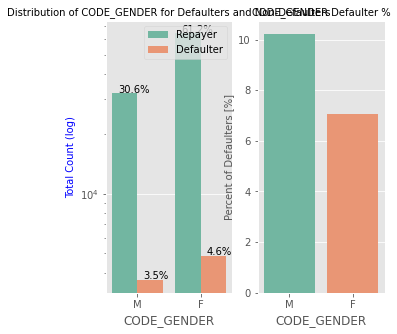

In [ ]:
plot_uni_cat('CODE_GENDER',True)

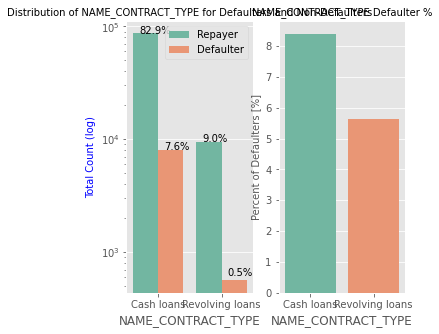

In [ ]:
# Checking the contract type based on loan repayment status
plot_uni_cat('NAME_CONTRACT_TYPE',True)


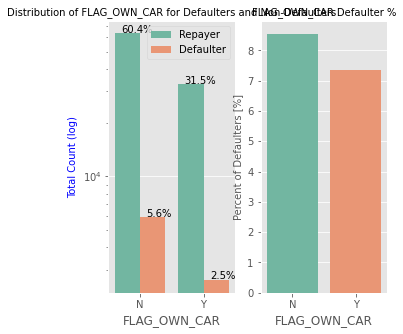

In [ ]:
plot_uni_cat('FLAG_OWN_CAR',True)

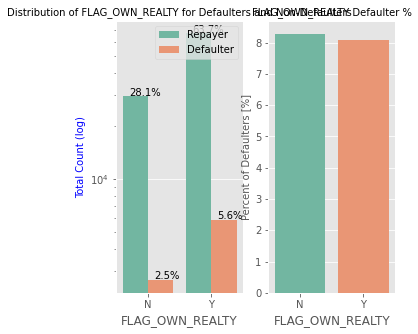

In [ ]:
plot_uni_cat('FLAG_OWN_REALTY',True)

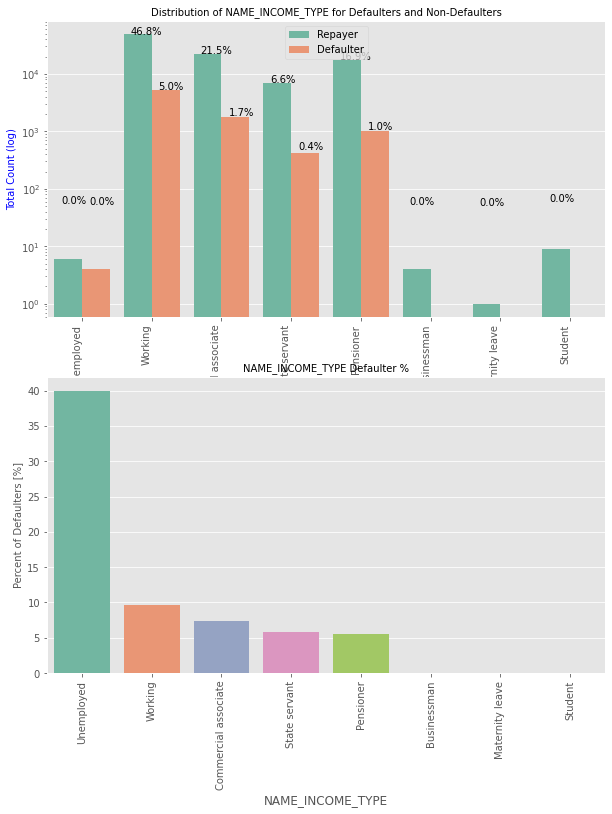

In [ ]:
plot_uni_cat('NAME_INCOME_TYPE',True,True,False)

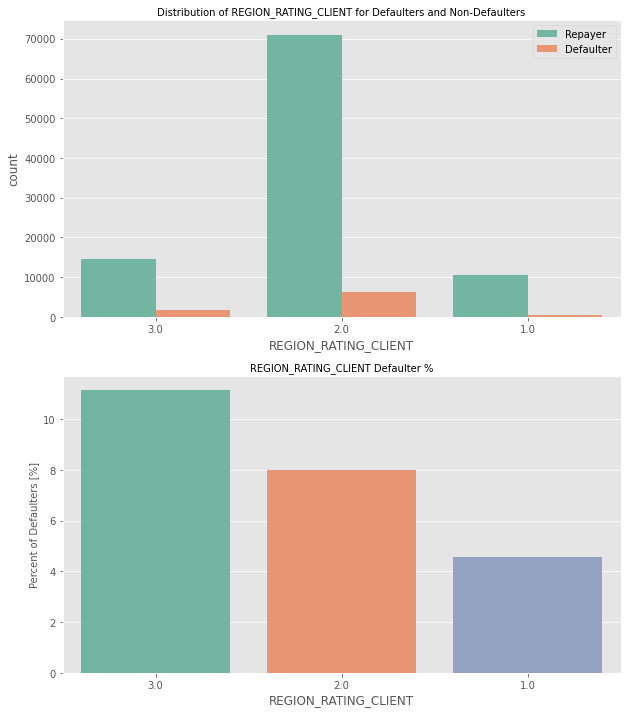

In [ ]:
plot_uni_cat("REGION_RATING_CLIENT",False,False,False)

Univariate Categorical Ordered Analysis

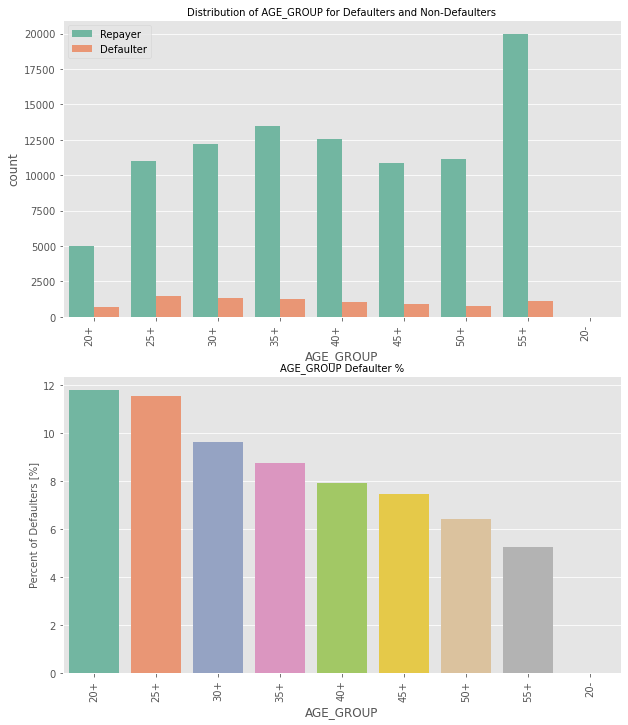

In [ ]:
plot_uni_cat('AGE_GROUP',False,True,False)

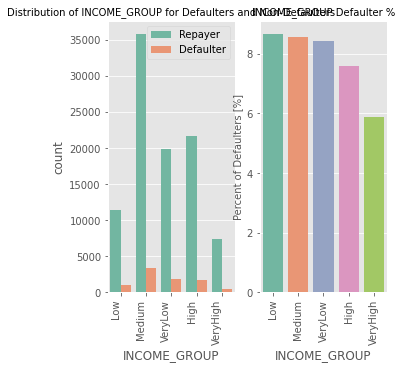

In [ ]:
plot_uni_cat('INCOME_GROUP',False,True,True)

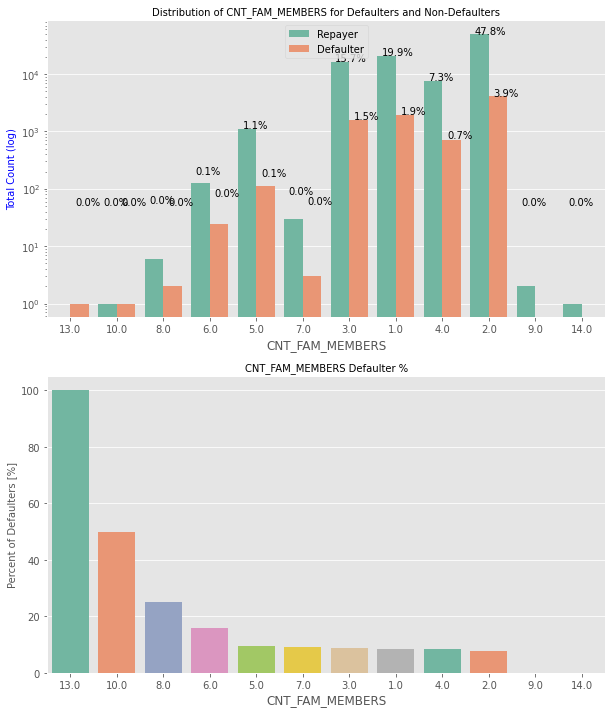

In [ ]:
plot_uni_cat("CNT_FAM_MEMBERS",True, False, False,False)

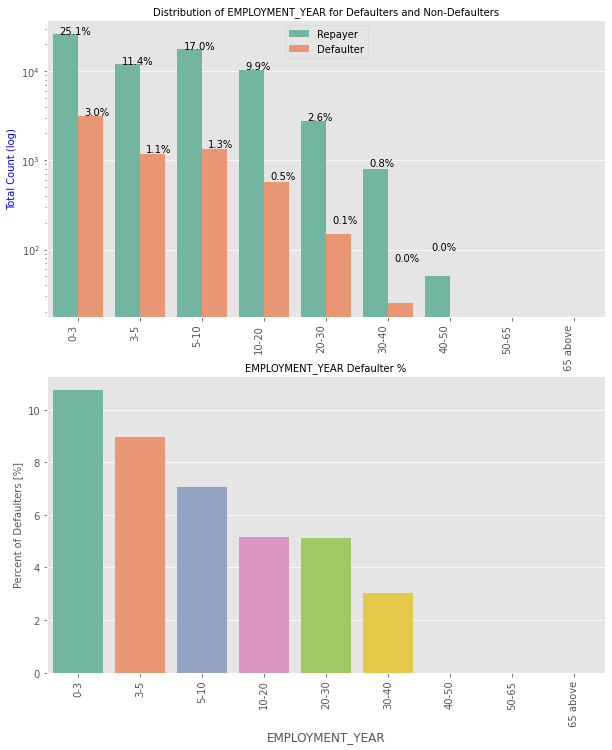

In [ ]:
plot_uni_cat("EMPLOYMENT_YEAR",True,True,False,False)

continuous variables

In [ ]:
default=app_data_final[app_data_final.TARGET==0]    # Dataframe with all the data related to non-defaulters
repay=app_data_final[app_data_final.TARGET==1]

In [ ]:
# function to dist plot for continuous variables
def plot_uni_cont(var):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  
    sns.distplot(a=repay[var],ax=ax1)

    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
            
    sns.distplot(a=default[var],ax=ax2)
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
        
    plt.show()

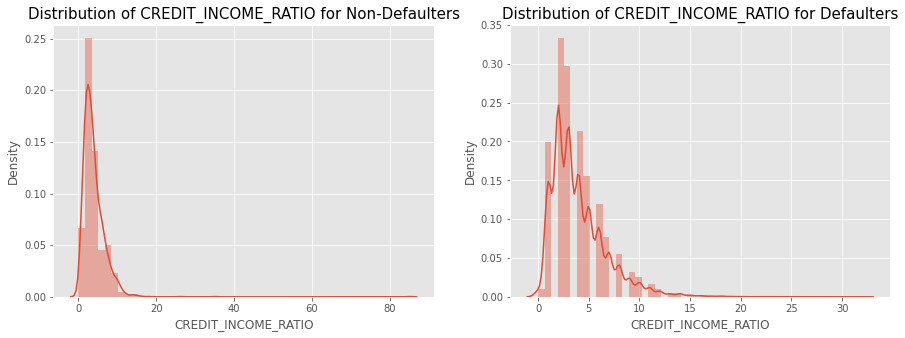

In [ ]:
plot_uni_cont('CREDIT_INCOME_RATIO')

In [ ]:
plot_uni_cont('')

Correlation numerical variables

In [ ]:
#Getting the top 10 correlation in repayers
corr=repay.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.982898,0.982898
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.949616,0.949616
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.902626,0.902626
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752843,0.752843
272,AMT_ANNUITY,AMT_CREDIT,0.751803,0.751803
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.604634,0.604634
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.593530,0.593530
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.353410,0.353410
113,DAYS_REGISTRATION,DAYS_EMPLOYED,0.207559,0.207559
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.194744,0.194744


In [ ]:
#Getting the top 10 correlation in defaulters
corr=repay.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Column1,Column2,Correlation,Abs_Correlation
308,AMT_GOODS_PRICE,AMT_CREDIT,0.982898,0.982898
297,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.949616,0.949616
208,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,SOCIAL_CIRCLE_30_DAYS_DEF_PERC,0.902626,0.902626
321,AMT_GOODS_PRICE,AMT_ANNUITY,0.752843,0.752843
272,AMT_ANNUITY,AMT_CREDIT,0.751803,0.751803
74,CREDIT_INCOME_RATIO,AMT_CREDIT,0.604634,0.604634
310,AMT_GOODS_PRICE,CREDIT_INCOME_RATIO,0.593530,0.593530
274,AMT_ANNUITY,CREDIT_INCOME_RATIO,0.353410,0.353410
113,DAYS_REGISTRATION,DAYS_EMPLOYED,0.207559,0.207559
149,CNT_FAM_MEMBERS,DAYS_EMPLOYED,-0.194744,0.194744


In [ ]:
#bivariate analysis
def plot_bivar(f1,f2):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x=f1, y=f2,data=repay,ax=ax1)
    ax1.set_xlabel(f1)    
    ax1.set_ylabel(f2)
    ax1.set_title(f'{f1} vs {f2} for Non-Defaulters',fontsize=15)
    
    sns.scatterplot(x=f1, y=f2,data=default,ax=ax2)
    ax2.set_xlabel(f1)    
    ax2.set_ylabel(f2)
    ax2.set_title(f'{f1} vs {f2} for Defaulters',fontsize=15)
            
    plt.show()


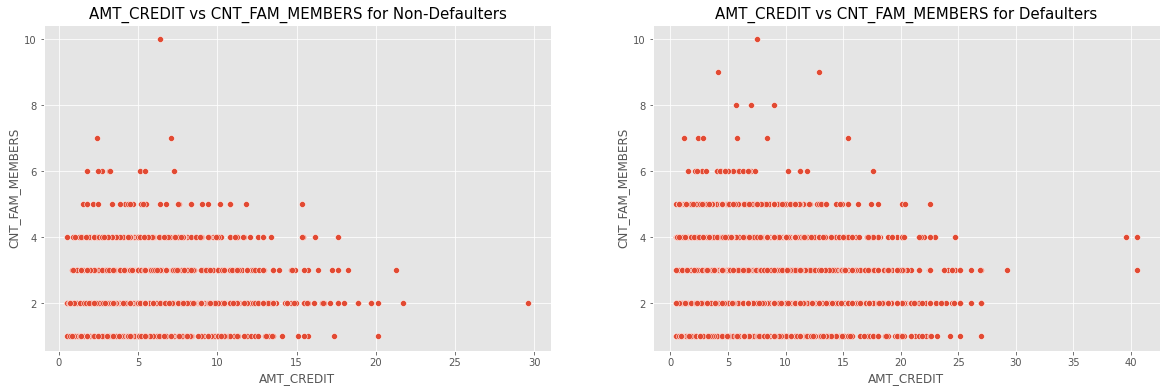

In [ ]:
plot_bivar('AMT_CREDIT','CNT_FAM_MEMBERS')

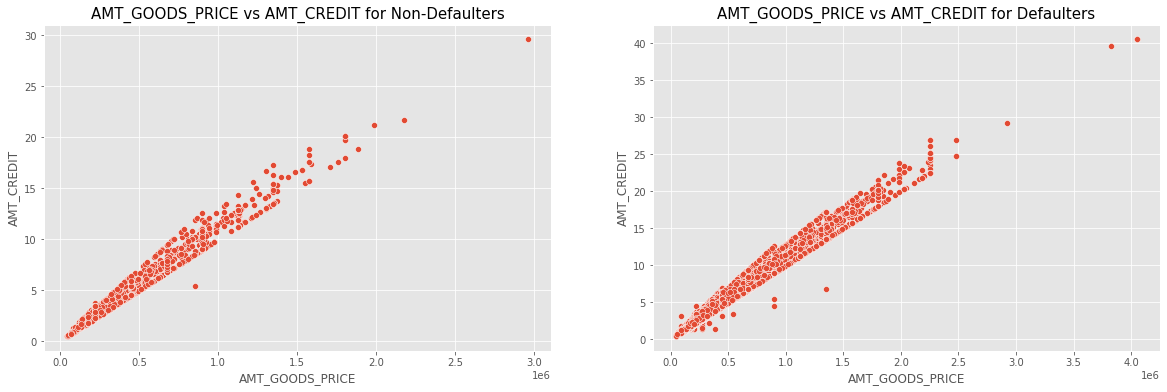

In [ ]:
plot_bivar('AMT_GOODS_PRICE','AMT_CREDIT')

In [ ]:
#merged data frame analysis
loan_risk_df = pd.merge(app_data, prev_data, how='inner', on='SK_ID_CURR')
loan_risk_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,SOCIAL_CIRCLE_60_DAYS_DEF_PERC,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_DECISION_GROUP
0,100006,0,Cash loans,F,N,Y,0,135000.0,3.126825,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,NaN,1,1,0,1.0,0.0,0.0,Laborers,2.0,2.0,2.0,WEDNESDAY,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,52,50+,8,5-10,2078043,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,15.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,181.0,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,Credit and cash offices,1.0,NaN,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0,0.0-400.0
1,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,NaN,1,1,0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,54,50+,8,5-10,2001242,Cash loans,16509.600,180000.0,180000.0,NaN,180000.0,14.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,865.0,Cash through the bank,XAP,Repeater,NaN,Cash,walk-in,Regional / Local,1200.0,Consumer electronics,18.0,high,Cash Street: high,365243.0,-834.0,-324.0,-354.0,-347.0,0.0,800.0-1200.0
2,100007,0,Cash loans,M,N,Y,0,121500.0,5.130000,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,NaN,1,1,0,1.0,0.0,0.0,Core staff,1.0,2.0,2.0,THURSDAY,11.0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,54,50+,8,5-10,2730157,Cash loans,13010.985,225000.0,284400.0,NaN,225000.0,13.0,Y,1.0,NaN,NaN,NaN,NaN,Approved,867.0,Cash through the bank,XAP,Repeater,NaN,Cash,x-sell,AP+ (Cash loan),4.0,NaN,48.0,middle,Cash X-Sell: middle,NaN,NaN,NaN,NaN,NaN,NaN,800.0-1200.0
3,100009,0,Cash loans,F,Y,Y,1,171000.0,15.607260,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,17.0,1,1,0,1.0,1.0,0.0,Accountants,3.0,2.0,2.0,SUNDAY,16.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37,35+,8,5-10,1413109,Consumer loans,8996.760,98239.5,98239.5,0.0,98239.5,18.0,Y,1.0,0.0,NaN,NaN,XAP,Approved,449.0,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,NaN,Regional / Local,164.0,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-418.0,-88.0,-88.0,-84.0,0.0,400.0-800.0
4,100012,0,Revolving loans,M,N,Y,0,135000.0,4.050000,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,NaN,1,1,0,1.0,0.0,0.0,Laborers,1.0,2.0,2.0,THURSDAY,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,39,35+,5,3-5,2243

In [ ]:
loan_risk_df.shape

(66562, 166)

In [ ]:
loan_risk_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66562 entries, 0 to 66561
Columns: 166 entries, SK_ID_CURR to DAYS_DECISION_GROUP
dtypes: category(19), float64(119), int64(12), object(16)
memory usage: 76.4+ MB


In [ ]:
L0 = loan_risk_df[loan_risk_df['TARGET']==0] # Repayers
L1 = loan_risk_df[loan_risk_df['TARGET']==1] # Defaulters

In [ ]:
#function to plot univar analysis 
